In [1]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

!pip install geopy
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

!pip install folium
import folium # map rendering library

print('Libraries imported.')


Libraries imported.


In [2]:
def get_new_york_data():
    url='https://cocl.us/new_york_dataset'
    resp=requests.get(url).json()
    # all data is present in features label
    features=resp['features']
    
    # define the dataframe columns
    column_names = ['Borough', 'Neighborhood', 'Latitude', 'Longitude'] 
    # instantiate the dataframe
    new_york_data = pd.DataFrame(columns=column_names)
    
    for data in features:
        borough = data['properties']['borough'] 
        neighborhood_name = data['properties']['name']
        
        neighborhood_latlon = data['geometry']['coordinates']
        neighborhood_lat = neighborhood_latlon[1]
        neighborhood_lon = neighborhood_latlon[0]
    
        new_york_data = new_york_data.append({'Borough': borough,
                                          'Neighborhood': neighborhood_name,
                                          'Latitude': neighborhood_lat,
                                          'Longitude': neighborhood_lon}, ignore_index=True)
    
    return new_york_data

neighborhoods = get_new_york_data()
neighborhoods.head()

,Borough,Neighborhood,Latitude,Longitude
0,Bronx,Wakefield,40.894705,-73.847201
1,Bronx,Co-op City,40.874294,-73.829939
2,Bronx,Eastchester,40.887556,-73.827806
3,Bronx,Fieldston,40.895437,-73.905643
4,Bronx,Riverdale,40.890834,-73.912585


In [3]:
CLIENT_ID = 'VRKV5HJQLP5JOY0CUBEDRM23NFA3IKG2BX0CDOWSUII5HDTI' # your Foursquare ID
CLIENT_SECRET = 'DQ5M4JTBTDRPO1IHCVZOODYRUHAFUKHMWSUZGZEQPUGYXMJD' # your Foursquare Secret
VERSION = '20180604'
radius=1000
LIMIT = 1000
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: VRKV5HJQLP5JOY0CUBEDRM23NFA3IKG2BX0CDOWSUII5HDTI
CLIENT_SECRET:DQ5M4JTBTDRPO1IHCVZOODYRUHAFUKHMWSUZGZEQPUGYXMJD


In [4]:
def geo_location(address):
    # get geo location of address
    geolocator = Nominatim(user_agent="ny_explorer")
    location = geolocator.geocode(address)
    latitude = location.latitude
    longitude = location.longitude
    return latitude,longitude

def venue_info(latitude,longitude):
    url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
                CLIENT_ID, 
                CLIENT_SECRET, 
                VERSION, 
                latitude, 
                longitude, 
                radius, 
                LIMIT)

        # get all the data
    results = requests.get(url).json()    
    venue_data=results["response"]['groups'][0]['items']
    venue_details=[]
    for row in venue_data:
        try:
            venue_id=row['venue']['id']
            venue_name=row['venue']['name']
            venue_category=row['venue']['categories'][0]['name']
            venue_details.append([venue_id,venue_name,venue_category])
        except KeyError:
            pass

    column_names=['ID','Name','Category']
    df= pd.DataFrame(venue_details,columns=column_names)
    return df

In [5]:
column_names=['Borough', 'Neighborhood', 'ID','Name']
grocery_ny=pd.DataFrame(columns=column_names)
whole_foods_ny=pd.DataFrame(columns=column_names)
whole_foods_comp_ny=pd.DataFrame(columns=column_names)
count=1
for Borough, Neighborhood, Latitude, Longitude in neighborhoods.values.tolist():
    #Borough, Neighborhood, Latitude, Longitude=row
    venues = venue_info(Latitude, Longitude)
    grocery=venues[venues['Category']=='Grocery Store']   
    print(count,'.', 'Grocery Stores in '+Neighborhood+', '+Borough+':'+str(len(grocery)))
    for id, name, category in grocery.values.tolist():
        #id, name , category=food_detail
        grocery_ny = grocery_ny.append({'Borough': Borough,
                                        'Neighborhood': Neighborhood, 
                                        'ID': id,
                                        'Name' : name
                                        }, ignore_index=True)
    whole_foods=venues[venues['Name']=='Whole Foods Market'] 
    print(count,'.', 'Whole Foods in '+Neighborhood+', '+Borough+':'+str(len(whole_foods)))
    for id, name, category in whole_foods.values.tolist():
        #id, name , category=food_detail
        whole_foods_ny = whole_foods_ny.append({'Borough': Borough,
                                                'Neighborhood': Neighborhood, 
                                                'ID': id,
                                                'Name' : name
                                               }, ignore_index=True)
    whole_foods1=venues[venues['Name']=='Whole Foods Market 365'] 
    print(count,'.', 'Whole Foods 365 in '+Neighborhood+', '+Borough+':'+str(len(whole_foods1)))
    for id, name, category in whole_foods1.values.tolist():
        #id, name , category=food_detail
        whole_foods_ny = whole_foods_ny.append({'Borough': Borough,
                                                'Neighborhood': Neighborhood, 
                                                'ID': id,
                                                'Name' : name
                                               }, ignore_index=True)
    whole_foods_comp=venues[venues['Name']=='Food Emporium']
    print(count,'.', 'Whole Foods Competitors in '+Neighborhood+', '+Borough+':'+str(len(whole_foods_comp)))
    for id, name, category in whole_foods_comp.values.tolist():
        #id, name , category=food_detail
        whole_foods_comp_ny = whole_foods_comp_ny.append({'Borough': Borough,
                                                'Neighborhood': Neighborhood, 
                                                'ID': id,
                                                'Name' : name
                                               }, ignore_index=True)
    whole_foods_comp1=venues[venues['Name']=='Fairway Market']
    print(count,'.', 'Whole Foods Competitors in '+Neighborhood+', '+Borough+':'+str(len(whole_foods_comp1)))
    for id, name, category in whole_foods_comp1.values.tolist():
        #id, name , category=food_detail
        whole_foods_comp_ny = whole_foods_comp_ny.append({'Borough': Borough,
                                                'Neighborhood': Neighborhood, 
                                                'ID': id,
                                                'Name' : name
                                               }, ignore_index=True)
    whole_foods_comp2=venues[venues['Name']=="Raley's"]
    print(count,'.', 'Whole Foods Competitors in '+Neighborhood+', '+Borough+':'+str(len(whole_foods_comp2)))
    for id, name, category in whole_foods_comp2.values.tolist():
        #id, name , category=food_detail
        whole_foods_comp_ny = whole_foods_comp_ny.append({'Borough': Borough,
                                                'Neighborhood': Neighborhood, 
                                                'ID': id,
                                                'Name' : name
                                               }, ignore_index=True)
    whole_foods_comp4=venues[venues['Name']=='The Fresh Market']
    print(count,'.', 'Whole Foods Competitors in '+Neighborhood+', '+Borough+':'+str(len(whole_foods_comp4)))
    for id, name, category in whole_foods_comp4.values.tolist():
        #id, name , category=food_detail
        whole_foods_comp_ny = whole_foods_comp_ny.append({'Borough': Borough,
                                                'Neighborhood': Neighborhood, 
                                                'ID': id,
                                                'Name' : name
                                               }, ignore_index=True)
    whole_foods_comp5=venues[venues['Name']=='Publix']
    print(count,'.', 'Whole Foods Competitors in '+Neighborhood+', '+Borough+':'+str(len(whole_foods_comp5)))
    for id, name, category in whole_foods_comp5.values.tolist():
        #id, name , category=food_detail
        whole_foods_comp_ny = whole_foods_comp_ny.append({'Borough': Borough,
                                                'Neighborhood': Neighborhood, 
                                                'ID': id,
                                                'Name' : name
                                               }, ignore_index=True)
    whole_foods_comp6=venues[venues['Name']=='Earth Fare']
    print(count,'.', 'Whole Foods Competitors in '+Neighborhood+', '+Borough+':'+str(len(whole_foods_comp6)))
    for id, name, category in whole_foods_comp6.values.tolist():
        #id, name , category=food_detail
        whole_foods_comp_ny = whole_foods_comp_ny.append({'Borough': Borough,
                                                'Neighborhood': Neighborhood, 
                                                'ID': id,
                                                'Name' : name
                                               }, ignore_index=True)
    whole_foods_comp7=venues[venues['Name']=="Trader Joe's"]
    print(count,'.', 'Whole Foods Competitors in '+Neighborhood+', '+Borough+':'+str(len(whole_foods_comp7)))
    for id, name, category in whole_foods_comp7.values.tolist():
        #id, name , category=food_detail
        whole_foods_comp_ny = whole_foods_comp_ny.append({'Borough': Borough,
                                                'Neighborhood': Neighborhood, 
                                                'ID': id,
                                                'Name' : name
                                               }, ignore_index=True)
    whole_foods_comp8=venues[venues['Name']=="CTown Supermarkets"]
    print(count,'.', 'Whole Foods Competitors in '+Neighborhood+', '+Borough+':'+str(len(whole_foods_comp8)))
    for id, name, category in whole_foods_comp8.values.tolist():
        #id, name , category=food_detail
        whole_foods_comp_ny = whole_foods_comp_ny.append({'Borough': Borough,
                                                'Neighborhood': Neighborhood, 
                                                'ID': id,
                                                'Name' : name
                                               }, ignore_index=True)
    count+=1



1 . Grocery Stores in Wakefield, Bronx:0
1 . Whole Foods in Wakefield, Bronx:0
1 . Whole Foods 365 in Wakefield, Bronx:0
1 . Whole Foods Competitors in Wakefield, Bronx:0
1 . Whole Foods Competitors in Wakefield, Bronx:0
1 . Whole Foods Competitors in Wakefield, Bronx:0
1 . Whole Foods Competitors in Wakefield, Bronx:0
1 . Whole Foods Competitors in Wakefield, Bronx:0
1 . Whole Foods Competitors in Wakefield, Bronx:0
1 . Whole Foods Competitors in Wakefield, Bronx:0
1 . Whole Foods Competitors in Wakefield, Bronx:0
2 . Grocery Stores in Co-op City, Bronx:1
2 . Whole Foods in Co-op City, Bronx:0
2 . Whole Foods 365 in Co-op City, Bronx:0
2 . Whole Foods Competitors in Co-op City, Bronx:0
2 . Whole Foods Competitors in Co-op City, Bronx:0
2 . Whole Foods Competitors in Co-op City, Bronx:0
2 . Whole Foods Competitors in Co-op City, Bronx:0
2 . Whole Foods Competitors in Co-op City, Bronx:0
2 . Whole Foods Competitors in Co-op City, Bronx:0
2 . Whole Foods Competitors in Co-op City, Bronx:

16 . Grocery Stores in Morris Heights, Bronx:4
16 . Whole Foods in Morris Heights, Bronx:0
16 . Whole Foods 365 in Morris Heights, Bronx:0
16 . Whole Foods Competitors in Morris Heights, Bronx:0
16 . Whole Foods Competitors in Morris Heights, Bronx:0
16 . Whole Foods Competitors in Morris Heights, Bronx:0
16 . Whole Foods Competitors in Morris Heights, Bronx:0
16 . Whole Foods Competitors in Morris Heights, Bronx:0
16 . Whole Foods Competitors in Morris Heights, Bronx:0
16 . Whole Foods Competitors in Morris Heights, Bronx:0
16 . Whole Foods Competitors in Morris Heights, Bronx:2
17 . Grocery Stores in Fordham, Bronx:2
17 . Whole Foods in Fordham, Bronx:0
17 . Whole Foods 365 in Fordham, Bronx:0
17 . Whole Foods Competitors in Fordham, Bronx:0
17 . Whole Foods Competitors in Fordham, Bronx:0
17 . Whole Foods Competitors in Fordham, Bronx:0
17 . Whole Foods Competitors in Fordham, Bronx:0
17 . Whole Foods Competitors in Fordham, Bronx:0
17 . Whole Foods Competitors in Fordham, Bronx:0
1

31 . Grocery Stores in Parkchester, Bronx:2
31 . Whole Foods in Parkchester, Bronx:0
31 . Whole Foods 365 in Parkchester, Bronx:0
31 . Whole Foods Competitors in Parkchester, Bronx:0
31 . Whole Foods Competitors in Parkchester, Bronx:0
31 . Whole Foods Competitors in Parkchester, Bronx:0
31 . Whole Foods Competitors in Parkchester, Bronx:0
31 . Whole Foods Competitors in Parkchester, Bronx:0
31 . Whole Foods Competitors in Parkchester, Bronx:0
31 . Whole Foods Competitors in Parkchester, Bronx:0
31 . Whole Foods Competitors in Parkchester, Bronx:1
32 . Grocery Stores in Westchester Square, Bronx:0
32 . Whole Foods in Westchester Square, Bronx:0
32 . Whole Foods 365 in Westchester Square, Bronx:0
32 . Whole Foods Competitors in Westchester Square, Bronx:0
32 . Whole Foods Competitors in Westchester Square, Bronx:0
32 . Whole Foods Competitors in Westchester Square, Bronx:0
32 . Whole Foods Competitors in Westchester Square, Bronx:0
32 . Whole Foods Competitors in Westchester Square, Bro

46 . Grocery Stores in Edenwald, Bronx:2
46 . Whole Foods in Edenwald, Bronx:0
46 . Whole Foods 365 in Edenwald, Bronx:0
46 . Whole Foods Competitors in Edenwald, Bronx:0
46 . Whole Foods Competitors in Edenwald, Bronx:0
46 . Whole Foods Competitors in Edenwald, Bronx:0
46 . Whole Foods Competitors in Edenwald, Bronx:0
46 . Whole Foods Competitors in Edenwald, Bronx:0
46 . Whole Foods Competitors in Edenwald, Bronx:0
46 . Whole Foods Competitors in Edenwald, Bronx:0
46 . Whole Foods Competitors in Edenwald, Bronx:1
47 . Grocery Stores in Bay Ridge, Brooklyn:2
47 . Whole Foods in Bay Ridge, Brooklyn:0
47 . Whole Foods 365 in Bay Ridge, Brooklyn:0
47 . Whole Foods Competitors in Bay Ridge, Brooklyn:0
47 . Whole Foods Competitors in Bay Ridge, Brooklyn:0
47 . Whole Foods Competitors in Bay Ridge, Brooklyn:0
47 . Whole Foods Competitors in Bay Ridge, Brooklyn:0
47 . Whole Foods Competitors in Bay Ridge, Brooklyn:0
47 . Whole Foods Competitors in Bay Ridge, Brooklyn:0
47 . Whole Foods Compe

60 . Grocery Stores in Prospect Heights, Brooklyn:1
60 . Whole Foods in Prospect Heights, Brooklyn:0
60 . Whole Foods 365 in Prospect Heights, Brooklyn:0
60 . Whole Foods Competitors in Prospect Heights, Brooklyn:0
60 . Whole Foods Competitors in Prospect Heights, Brooklyn:0
60 . Whole Foods Competitors in Prospect Heights, Brooklyn:0
60 . Whole Foods Competitors in Prospect Heights, Brooklyn:0
60 . Whole Foods Competitors in Prospect Heights, Brooklyn:0
60 . Whole Foods Competitors in Prospect Heights, Brooklyn:0
60 . Whole Foods Competitors in Prospect Heights, Brooklyn:0
60 . Whole Foods Competitors in Prospect Heights, Brooklyn:0
61 . Grocery Stores in Brownsville, Brooklyn:1
61 . Whole Foods in Brownsville, Brooklyn:0
61 . Whole Foods 365 in Brownsville, Brooklyn:0
61 . Whole Foods Competitors in Brownsville, Brooklyn:0
61 . Whole Foods Competitors in Brownsville, Brooklyn:0
61 . Whole Foods Competitors in Brownsville, Brooklyn:0
61 . Whole Foods Competitors in Brownsville, Brookl

74 . Grocery Stores in Starrett City, Brooklyn:0
74 . Whole Foods in Starrett City, Brooklyn:0
74 . Whole Foods 365 in Starrett City, Brooklyn:0
74 . Whole Foods Competitors in Starrett City, Brooklyn:0
74 . Whole Foods Competitors in Starrett City, Brooklyn:0
74 . Whole Foods Competitors in Starrett City, Brooklyn:0
74 . Whole Foods Competitors in Starrett City, Brooklyn:0
74 . Whole Foods Competitors in Starrett City, Brooklyn:0
74 . Whole Foods Competitors in Starrett City, Brooklyn:0
74 . Whole Foods Competitors in Starrett City, Brooklyn:0
74 . Whole Foods Competitors in Starrett City, Brooklyn:0
75 . Grocery Stores in Canarsie, Brooklyn:2
75 . Whole Foods in Canarsie, Brooklyn:0
75 . Whole Foods 365 in Canarsie, Brooklyn:0
75 . Whole Foods Competitors in Canarsie, Brooklyn:0
75 . Whole Foods Competitors in Canarsie, Brooklyn:0
75 . Whole Foods Competitors in Canarsie, Brooklyn:0
75 . Whole Foods Competitors in Canarsie, Brooklyn:0
75 . Whole Foods Competitors in Canarsie, Brookly

88 . Grocery Stores in Boerum Hill, Brooklyn:4
88 . Whole Foods in Boerum Hill, Brooklyn:0
88 . Whole Foods 365 in Boerum Hill, Brooklyn:1
88 . Whole Foods Competitors in Boerum Hill, Brooklyn:0
88 . Whole Foods Competitors in Boerum Hill, Brooklyn:0
88 . Whole Foods Competitors in Boerum Hill, Brooklyn:0
88 . Whole Foods Competitors in Boerum Hill, Brooklyn:0
88 . Whole Foods Competitors in Boerum Hill, Brooklyn:0
88 . Whole Foods Competitors in Boerum Hill, Brooklyn:0
88 . Whole Foods Competitors in Boerum Hill, Brooklyn:1
88 . Whole Foods Competitors in Boerum Hill, Brooklyn:0
89 . Grocery Stores in Prospect Lefferts Gardens, Brooklyn:2
89 . Whole Foods in Prospect Lefferts Gardens, Brooklyn:0
89 . Whole Foods 365 in Prospect Lefferts Gardens, Brooklyn:0
89 . Whole Foods Competitors in Prospect Lefferts Gardens, Brooklyn:0
89 . Whole Foods Competitors in Prospect Lefferts Gardens, Brooklyn:0
89 . Whole Foods Competitors in Prospect Lefferts Gardens, Brooklyn:0
89 . Whole Foods Compe

102 . Grocery Stores in Washington Heights, Manhattan:2
102 . Whole Foods in Washington Heights, Manhattan:0
102 . Whole Foods 365 in Washington Heights, Manhattan:0
102 . Whole Foods Competitors in Washington Heights, Manhattan:0
102 . Whole Foods Competitors in Washington Heights, Manhattan:0
102 . Whole Foods Competitors in Washington Heights, Manhattan:0
102 . Whole Foods Competitors in Washington Heights, Manhattan:0
102 . Whole Foods Competitors in Washington Heights, Manhattan:0
102 . Whole Foods Competitors in Washington Heights, Manhattan:0
102 . Whole Foods Competitors in Washington Heights, Manhattan:0
102 . Whole Foods Competitors in Washington Heights, Manhattan:0
103 . Grocery Stores in Inwood, Manhattan:1
103 . Whole Foods in Inwood, Manhattan:0
103 . Whole Foods 365 in Inwood, Manhattan:0
103 . Whole Foods Competitors in Inwood, Manhattan:0
103 . Whole Foods Competitors in Inwood, Manhattan:0
103 . Whole Foods Competitors in Inwood, Manhattan:0
103 . Whole Foods Competi

116 . Grocery Stores in Murray Hill, Manhattan:2
116 . Whole Foods in Murray Hill, Manhattan:0
116 . Whole Foods 365 in Murray Hill, Manhattan:0
116 . Whole Foods Competitors in Murray Hill, Manhattan:0
116 . Whole Foods Competitors in Murray Hill, Manhattan:0
116 . Whole Foods Competitors in Murray Hill, Manhattan:0
116 . Whole Foods Competitors in Murray Hill, Manhattan:0
116 . Whole Foods Competitors in Murray Hill, Manhattan:0
116 . Whole Foods Competitors in Murray Hill, Manhattan:0
116 . Whole Foods Competitors in Murray Hill, Manhattan:1
116 . Whole Foods Competitors in Murray Hill, Manhattan:0
117 . Grocery Stores in Chelsea, Manhattan:1
117 . Whole Foods in Chelsea, Manhattan:0
117 . Whole Foods 365 in Chelsea, Manhattan:0
117 . Whole Foods Competitors in Chelsea, Manhattan:0
117 . Whole Foods Competitors in Chelsea, Manhattan:0
117 . Whole Foods Competitors in Chelsea, Manhattan:0
117 . Whole Foods Competitors in Chelsea, Manhattan:0
117 . Whole Foods Competitors in Chelsea, 

130 . Grocery Stores in Astoria, Queens:4
130 . Whole Foods in Astoria, Queens:0
130 . Whole Foods 365 in Astoria, Queens:0
130 . Whole Foods Competitors in Astoria, Queens:0
130 . Whole Foods Competitors in Astoria, Queens:0
130 . Whole Foods Competitors in Astoria, Queens:0
130 . Whole Foods Competitors in Astoria, Queens:0
130 . Whole Foods Competitors in Astoria, Queens:0
130 . Whole Foods Competitors in Astoria, Queens:0
130 . Whole Foods Competitors in Astoria, Queens:0
130 . Whole Foods Competitors in Astoria, Queens:0
131 . Grocery Stores in Woodside, Queens:6
131 . Whole Foods in Woodside, Queens:0
131 . Whole Foods 365 in Woodside, Queens:0
131 . Whole Foods Competitors in Woodside, Queens:0
131 . Whole Foods Competitors in Woodside, Queens:0
131 . Whole Foods Competitors in Woodside, Queens:0
131 . Whole Foods Competitors in Woodside, Queens:0
131 . Whole Foods Competitors in Woodside, Queens:0
131 . Whole Foods Competitors in Woodside, Queens:0
131 . Whole Foods Competitors

145 . Grocery Stores in Glendale, Queens:0
145 . Whole Foods in Glendale, Queens:0
145 . Whole Foods 365 in Glendale, Queens:0
145 . Whole Foods Competitors in Glendale, Queens:0
145 . Whole Foods Competitors in Glendale, Queens:0
145 . Whole Foods Competitors in Glendale, Queens:0
145 . Whole Foods Competitors in Glendale, Queens:0
145 . Whole Foods Competitors in Glendale, Queens:0
145 . Whole Foods Competitors in Glendale, Queens:0
145 . Whole Foods Competitors in Glendale, Queens:0
145 . Whole Foods Competitors in Glendale, Queens:0
146 . Grocery Stores in Rego Park, Queens:5
146 . Whole Foods in Rego Park, Queens:0
146 . Whole Foods 365 in Rego Park, Queens:0
146 . Whole Foods Competitors in Rego Park, Queens:0
146 . Whole Foods Competitors in Rego Park, Queens:0
146 . Whole Foods Competitors in Rego Park, Queens:0
146 . Whole Foods Competitors in Rego Park, Queens:0
146 . Whole Foods Competitors in Rego Park, Queens:0
146 . Whole Foods Competitors in Rego Park, Queens:0
146 . Who

160 . Grocery Stores in Briarwood, Queens:1
160 . Whole Foods in Briarwood, Queens:0
160 . Whole Foods 365 in Briarwood, Queens:0
160 . Whole Foods Competitors in Briarwood, Queens:0
160 . Whole Foods Competitors in Briarwood, Queens:0
160 . Whole Foods Competitors in Briarwood, Queens:0
160 . Whole Foods Competitors in Briarwood, Queens:0
160 . Whole Foods Competitors in Briarwood, Queens:0
160 . Whole Foods Competitors in Briarwood, Queens:0
160 . Whole Foods Competitors in Briarwood, Queens:0
160 . Whole Foods Competitors in Briarwood, Queens:0
161 . Grocery Stores in Jamaica Center, Queens:1
161 . Whole Foods in Jamaica Center, Queens:0
161 . Whole Foods 365 in Jamaica Center, Queens:0
161 . Whole Foods Competitors in Jamaica Center, Queens:0
161 . Whole Foods Competitors in Jamaica Center, Queens:0
161 . Whole Foods Competitors in Jamaica Center, Queens:0
161 . Whole Foods Competitors in Jamaica Center, Queens:0
161 . Whole Foods Competitors in Jamaica Center, Queens:0
161 . Whole

174 . Grocery Stores in Steinway, Queens:2
174 . Whole Foods in Steinway, Queens:0
174 . Whole Foods 365 in Steinway, Queens:0
174 . Whole Foods Competitors in Steinway, Queens:0
174 . Whole Foods Competitors in Steinway, Queens:0
174 . Whole Foods Competitors in Steinway, Queens:0
174 . Whole Foods Competitors in Steinway, Queens:0
174 . Whole Foods Competitors in Steinway, Queens:0
174 . Whole Foods Competitors in Steinway, Queens:0
174 . Whole Foods Competitors in Steinway, Queens:0
174 . Whole Foods Competitors in Steinway, Queens:0
175 . Grocery Stores in Beechhurst, Queens:0
175 . Whole Foods in Beechhurst, Queens:0
175 . Whole Foods 365 in Beechhurst, Queens:0
175 . Whole Foods Competitors in Beechhurst, Queens:0
175 . Whole Foods Competitors in Beechhurst, Queens:0
175 . Whole Foods Competitors in Beechhurst, Queens:0
175 . Whole Foods Competitors in Beechhurst, Queens:0
175 . Whole Foods Competitors in Beechhurst, Queens:0
175 . Whole Foods Competitors in Beechhurst, Queens:0


189 . Grocery Stores in Laurelton, Queens:1
189 . Whole Foods in Laurelton, Queens:0
189 . Whole Foods 365 in Laurelton, Queens:0
189 . Whole Foods Competitors in Laurelton, Queens:0
189 . Whole Foods Competitors in Laurelton, Queens:0
189 . Whole Foods Competitors in Laurelton, Queens:0
189 . Whole Foods Competitors in Laurelton, Queens:0
189 . Whole Foods Competitors in Laurelton, Queens:0
189 . Whole Foods Competitors in Laurelton, Queens:0
189 . Whole Foods Competitors in Laurelton, Queens:0
189 . Whole Foods Competitors in Laurelton, Queens:0
190 . Grocery Stores in Lefrak City, Queens:2
190 . Whole Foods in Lefrak City, Queens:0
190 . Whole Foods 365 in Lefrak City, Queens:0
190 . Whole Foods Competitors in Lefrak City, Queens:0
190 . Whole Foods Competitors in Lefrak City, Queens:0
190 . Whole Foods Competitors in Lefrak City, Queens:0
190 . Whole Foods Competitors in Lefrak City, Queens:0
190 . Whole Foods Competitors in Lefrak City, Queens:0
190 . Whole Foods Competitors in Le

203 . Grocery Stores in Grymes Hill, Staten Island:0
203 . Whole Foods in Grymes Hill, Staten Island:0
203 . Whole Foods 365 in Grymes Hill, Staten Island:0
203 . Whole Foods Competitors in Grymes Hill, Staten Island:0
203 . Whole Foods Competitors in Grymes Hill, Staten Island:0
203 . Whole Foods Competitors in Grymes Hill, Staten Island:0
203 . Whole Foods Competitors in Grymes Hill, Staten Island:0
203 . Whole Foods Competitors in Grymes Hill, Staten Island:0
203 . Whole Foods Competitors in Grymes Hill, Staten Island:0
203 . Whole Foods Competitors in Grymes Hill, Staten Island:0
203 . Whole Foods Competitors in Grymes Hill, Staten Island:0
204 . Grocery Stores in Todt Hill, Staten Island:0
204 . Whole Foods in Todt Hill, Staten Island:0
204 . Whole Foods 365 in Todt Hill, Staten Island:0
204 . Whole Foods Competitors in Todt Hill, Staten Island:0
204 . Whole Foods Competitors in Todt Hill, Staten Island:0
204 . Whole Foods Competitors in Todt Hill, Staten Island:0
204 . Whole Food

217 . Grocery Stores in Woodrow, Staten Island:2
217 . Whole Foods in Woodrow, Staten Island:0
217 . Whole Foods 365 in Woodrow, Staten Island:0
217 . Whole Foods Competitors in Woodrow, Staten Island:0
217 . Whole Foods Competitors in Woodrow, Staten Island:0
217 . Whole Foods Competitors in Woodrow, Staten Island:0
217 . Whole Foods Competitors in Woodrow, Staten Island:0
217 . Whole Foods Competitors in Woodrow, Staten Island:0
217 . Whole Foods Competitors in Woodrow, Staten Island:0
217 . Whole Foods Competitors in Woodrow, Staten Island:0
217 . Whole Foods Competitors in Woodrow, Staten Island:0
218 . Grocery Stores in Tottenville, Staten Island:0
218 . Whole Foods in Tottenville, Staten Island:0
218 . Whole Foods 365 in Tottenville, Staten Island:0
218 . Whole Foods Competitors in Tottenville, Staten Island:0
218 . Whole Foods Competitors in Tottenville, Staten Island:0
218 . Whole Foods Competitors in Tottenville, Staten Island:0
218 . Whole Foods Competitors in Tottenville, St

231 . Grocery Stores in Old Town, Staten Island:1
231 . Whole Foods in Old Town, Staten Island:0
231 . Whole Foods 365 in Old Town, Staten Island:0
231 . Whole Foods Competitors in Old Town, Staten Island:0
231 . Whole Foods Competitors in Old Town, Staten Island:0
231 . Whole Foods Competitors in Old Town, Staten Island:0
231 . Whole Foods Competitors in Old Town, Staten Island:0
231 . Whole Foods Competitors in Old Town, Staten Island:0
231 . Whole Foods Competitors in Old Town, Staten Island:0
231 . Whole Foods Competitors in Old Town, Staten Island:0
231 . Whole Foods Competitors in Old Town, Staten Island:0
232 . Grocery Stores in Dongan Hills, Staten Island:0
232 . Whole Foods in Dongan Hills, Staten Island:0
232 . Whole Foods 365 in Dongan Hills, Staten Island:0
232 . Whole Foods Competitors in Dongan Hills, Staten Island:0
232 . Whole Foods Competitors in Dongan Hills, Staten Island:0
232 . Whole Foods Competitors in Dongan Hills, Staten Island:0
232 . Whole Foods Competitors i

244 . Grocery Stores in Heartland Village, Staten Island:1
244 . Whole Foods in Heartland Village, Staten Island:0
244 . Whole Foods 365 in Heartland Village, Staten Island:0
244 . Whole Foods Competitors in Heartland Village, Staten Island:0
244 . Whole Foods Competitors in Heartland Village, Staten Island:0
244 . Whole Foods Competitors in Heartland Village, Staten Island:0
244 . Whole Foods Competitors in Heartland Village, Staten Island:0
244 . Whole Foods Competitors in Heartland Village, Staten Island:0
244 . Whole Foods Competitors in Heartland Village, Staten Island:0
244 . Whole Foods Competitors in Heartland Village, Staten Island:1
244 . Whole Foods Competitors in Heartland Village, Staten Island:0
245 . Grocery Stores in Chelsea, Staten Island:0
245 . Whole Foods in Chelsea, Staten Island:0
245 . Whole Foods 365 in Chelsea, Staten Island:0
245 . Whole Foods Competitors in Chelsea, Staten Island:0
245 . Whole Foods Competitors in Chelsea, Staten Island:0
245 . Whole Foods Co

257 . Grocery Stores in Randall Manor, Staten Island:0
257 . Whole Foods in Randall Manor, Staten Island:0
257 . Whole Foods 365 in Randall Manor, Staten Island:0
257 . Whole Foods Competitors in Randall Manor, Staten Island:0
257 . Whole Foods Competitors in Randall Manor, Staten Island:0
257 . Whole Foods Competitors in Randall Manor, Staten Island:0
257 . Whole Foods Competitors in Randall Manor, Staten Island:0
257 . Whole Foods Competitors in Randall Manor, Staten Island:0
257 . Whole Foods Competitors in Randall Manor, Staten Island:0
257 . Whole Foods Competitors in Randall Manor, Staten Island:0
257 . Whole Foods Competitors in Randall Manor, Staten Island:0
258 . Grocery Stores in Howland Hook, Staten Island:0
258 . Whole Foods in Howland Hook, Staten Island:0
258 . Whole Foods 365 in Howland Hook, Staten Island:0
258 . Whole Foods Competitors in Howland Hook, Staten Island:0
258 . Whole Foods Competitors in Howland Hook, Staten Island:0
258 . Whole Foods Competitors in Howlan

271 . Grocery Stores in Mount Hope, Bronx:6
271 . Whole Foods in Mount Hope, Bronx:0
271 . Whole Foods 365 in Mount Hope, Bronx:0
271 . Whole Foods Competitors in Mount Hope, Bronx:0
271 . Whole Foods Competitors in Mount Hope, Bronx:0
271 . Whole Foods Competitors in Mount Hope, Bronx:0
271 . Whole Foods Competitors in Mount Hope, Bronx:0
271 . Whole Foods Competitors in Mount Hope, Bronx:0
271 . Whole Foods Competitors in Mount Hope, Bronx:0
271 . Whole Foods Competitors in Mount Hope, Bronx:0
271 . Whole Foods Competitors in Mount Hope, Bronx:3
272 . Grocery Stores in Sutton Place, Manhattan:2
272 . Whole Foods in Sutton Place, Manhattan:1
272 . Whole Foods 365 in Sutton Place, Manhattan:0
272 . Whole Foods Competitors in Sutton Place, Manhattan:0
272 . Whole Foods Competitors in Sutton Place, Manhattan:0
272 . Whole Foods Competitors in Sutton Place, Manhattan:0
272 . Whole Foods Competitors in Sutton Place, Manhattan:0
272 . Whole Foods Competitors in Sutton Place, Manhattan:0
272

285 . Grocery Stores in Manor Heights, Staten Island:1
285 . Whole Foods in Manor Heights, Staten Island:0
285 . Whole Foods 365 in Manor Heights, Staten Island:0
285 . Whole Foods Competitors in Manor Heights, Staten Island:0
285 . Whole Foods Competitors in Manor Heights, Staten Island:0
285 . Whole Foods Competitors in Manor Heights, Staten Island:0
285 . Whole Foods Competitors in Manor Heights, Staten Island:0
285 . Whole Foods Competitors in Manor Heights, Staten Island:0
285 . Whole Foods Competitors in Manor Heights, Staten Island:0
285 . Whole Foods Competitors in Manor Heights, Staten Island:0
285 . Whole Foods Competitors in Manor Heights, Staten Island:1
286 . Grocery Stores in Willowbrook, Staten Island:0
286 . Whole Foods in Willowbrook, Staten Island:0
286 . Whole Foods 365 in Willowbrook, Staten Island:0
286 . Whole Foods Competitors in Willowbrook, Staten Island:0
286 . Whole Foods Competitors in Willowbrook, Staten Island:0
286 . Whole Foods Competitors in Willowbrook

299 . Grocery Stores in Allerton, Bronx:0
299 . Whole Foods in Allerton, Bronx:0
299 . Whole Foods 365 in Allerton, Bronx:0
299 . Whole Foods Competitors in Allerton, Bronx:0
299 . Whole Foods Competitors in Allerton, Bronx:0
299 . Whole Foods Competitors in Allerton, Bronx:0
299 . Whole Foods Competitors in Allerton, Bronx:0
299 . Whole Foods Competitors in Allerton, Bronx:0
299 . Whole Foods Competitors in Allerton, Bronx:0
299 . Whole Foods Competitors in Allerton, Bronx:0
299 . Whole Foods Competitors in Allerton, Bronx:0
300 . Grocery Stores in Kingsbridge Heights, Bronx:0
300 . Whole Foods in Kingsbridge Heights, Bronx:0
300 . Whole Foods 365 in Kingsbridge Heights, Bronx:0
300 . Whole Foods Competitors in Kingsbridge Heights, Bronx:0
300 . Whole Foods Competitors in Kingsbridge Heights, Bronx:0
300 . Whole Foods Competitors in Kingsbridge Heights, Bronx:0
300 . Whole Foods Competitors in Kingsbridge Heights, Bronx:0
300 . Whole Foods Competitors in Kingsbridge Heights, Bronx:0
3

In [6]:
grocery_ny.head(200)

,Borough,Neighborhood,ID,Name
0,Bronx,Co-op City,4c2e2ce63a4d0f47a81de586,Food Universe Marketplace
1,Bronx,Eastchester,4bc5bc8b5935c9b6a843a6d2,Fairway Market
2,Bronx,Eastchester,508d4c4fe4b09ddc7f545a4f,CTown Supermarkets
3,Bronx,Kingsbridge,4b821f5ef964a5200ecb30e3,Foodtown of Riverdale
4,Bronx,Kingsbridge,50a1590100cab279dee0de5f,Food Dynasty
5,Manhattan,Marble Hill,4b821f5ef964a5200ecb30e3,Foodtown of Riverdale
6,Bronx,Woodlawn,5aa190029e0d5450f94ed953,CTown Supermarkets
7,Bronx,Norwood,4c4644e9cd5ca593af610087,CTown Supermarkets
8,Bronx,Norwood,4d87f0f626a36ea8a058c3ad,Foodtown of Bainbridge
9,Bronx,Williamsbridge,51ebe5e3498ec8b5551ee9c3,CTown Supermarkets


In [7]:
grocery_ny_length=len(grocery_ny)
grocery_ny_length

414

In [8]:
whole_foods_ny.head(20)

,Borough,Neighborhood,ID,Name
0,Brooklyn,Carroll Gardens,52781665498e79b52476d279,Whole Foods Market
1,Brooklyn,Gowanus,52781665498e79b52476d279,Whole Foods Market
2,Brooklyn,Fort Greene,589ccf6cf16bb565be3091d4,Whole Foods Market 365
3,Brooklyn,Downtown,589ccf6cf16bb565be3091d4,Whole Foods Market 365
4,Brooklyn,Boerum Hill,589ccf6cf16bb565be3091d4,Whole Foods Market 365
5,Brooklyn,North Side,57ffc2e438fad9d2a9122e23,Whole Foods Market
6,Manhattan,Central Harlem,5749875c498e1c0c6e530433,Whole Foods Market
7,Manhattan,Lincoln Square,4530db29f964a520613b1fe3,Whole Foods Market
8,Manhattan,Midtown,5866f5c30b7e937108ec2adb,Whole Foods Market
9,Manhattan,Tribeca,49bc3b0af964a52020541fe3,Whole Foods Market


In [9]:
whole_foods_comp_ny.head()

,Borough,Neighborhood,ID,Name
0,Bronx,Eastchester,4bc5bc8b5935c9b6a843a6d2,Fairway Market
1,Bronx,Eastchester,508d4c4fe4b09ddc7f545a4f,CTown Supermarkets
2,Bronx,Woodlawn,5aa190029e0d5450f94ed953,CTown Supermarkets
3,Bronx,Norwood,4c4644e9cd5ca593af610087,CTown Supermarkets
4,Bronx,Williamsbridge,51ebe5e3498ec8b5551ee9c3,CTown Supermarkets


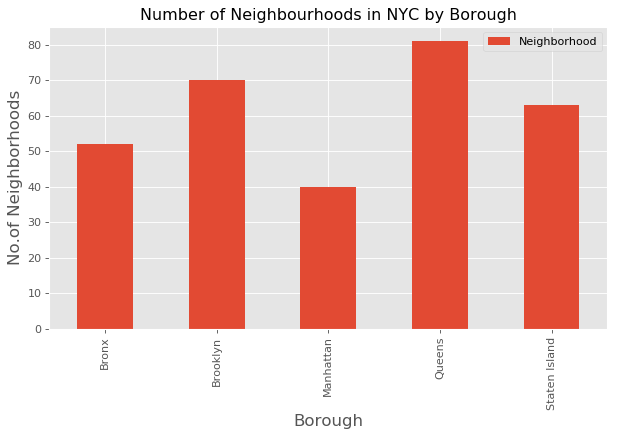

In [10]:
from matplotlib import pyplot as plt
plt.style.use('ggplot')

plt.figure(figsize=(9,5), dpi = 80)
# title
plt.title('Number of Neighbourhoods in NYC by Borough')
#On x-axis
plt.xlabel('Borough', fontsize = 15)
#On y-axis
plt.ylabel('No.of Neighborhoods', fontsize=15)
#giving a bar plot
neighborhoods.groupby('Borough')['Neighborhood'].count().plot(kind='bar')
#legend
plt.legend()
plt.show()

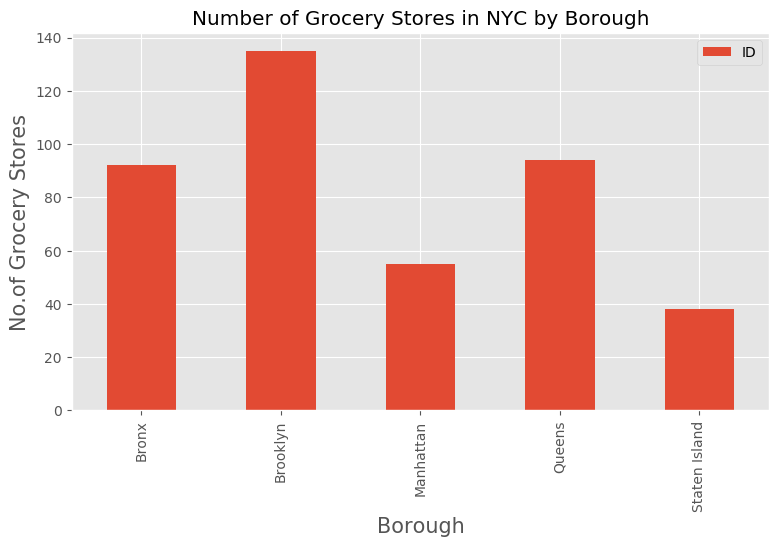

In [11]:
from matplotlib import pyplot as plt
plt.style.use('ggplot')

plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('Number of Grocery Stores in NYC by Borough')
#On x-axis
plt.xlabel('Borough', fontsize = 15)
#On y-axis
plt.ylabel('No.of Grocery Stores', fontsize=15)
#giving a bar plot
grocery_ny.groupby('Borough')['ID'].count().plot(kind='bar')
#legend
plt.legend()
#displays the plot
plt.show()

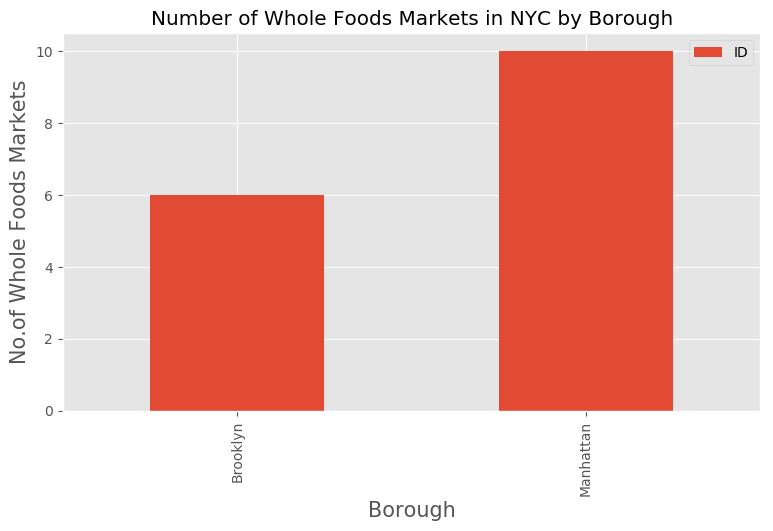

In [12]:
whole_foods_ny.head()

plt.style.use('ggplot')

plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('Number of Whole Foods Markets in NYC by Borough')
#On x-axis
plt.xlabel('Borough', fontsize = 15)
#On y-axis
plt.ylabel('No.of Whole Foods Markets', fontsize=15)
#giving a bar plot
whole_foods_ny.groupby('Borough')['ID'].count().plot(kind='bar')
#legend
plt.legend()
#displays the plot
plt.show()

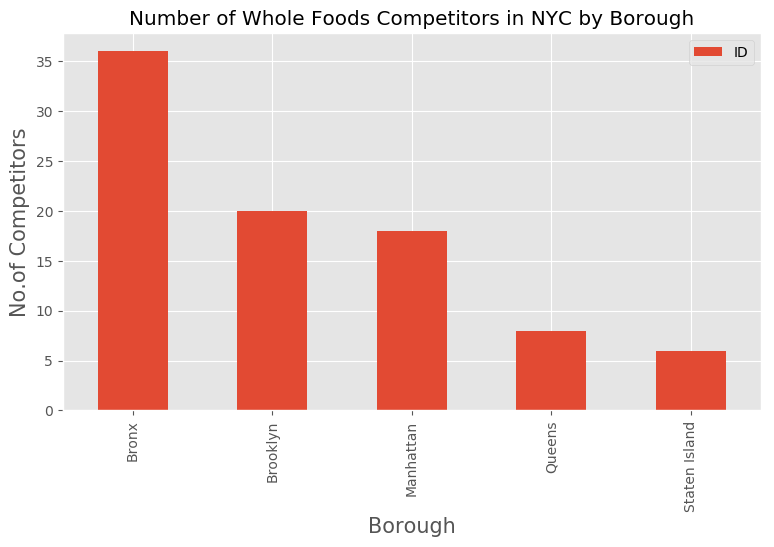

In [13]:
plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('Number of Whole Foods Competitors in NYC by Borough')
#On x-axis
plt.xlabel('Borough', fontsize = 15)
#On y-axis
plt.ylabel('No.of Competitors', fontsize=15)
#giving a bar plot
whole_foods_comp_ny.groupby('Borough')['ID'].count().plot(kind='bar')
#legend
plt.legend()
#displays the plot
plt.show()

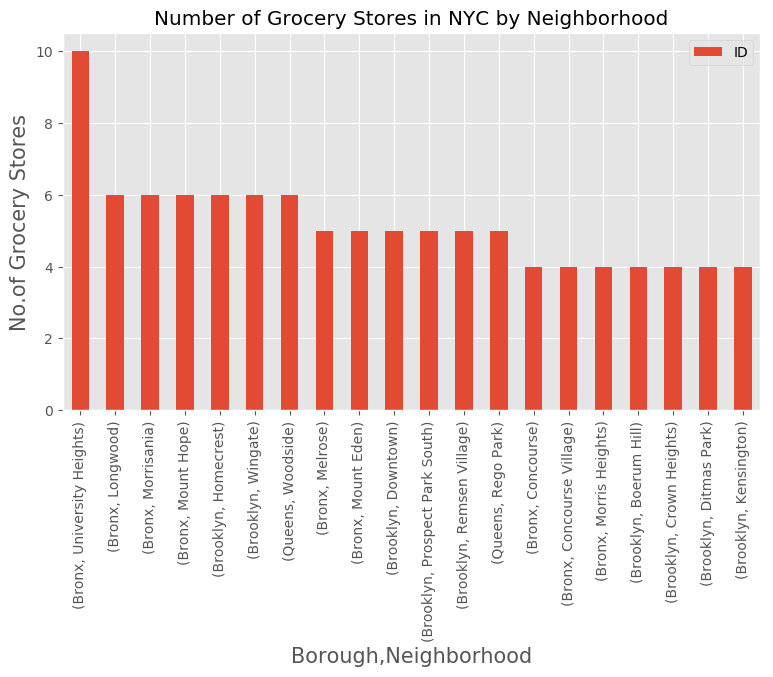

In [14]:
plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('Number of Grocery Stores in NYC by Neighborhood')
#On x-axis
plt.xlabel('Neighborhood', fontsize = 15)
#On y-axis
plt.ylabel('No.of Grocery Stores', fontsize=15)
#giving a bar plot
grocery_ny.groupby(['Borough','Neighborhood'])['ID'].count().nlargest(20).plot(kind='bar')
#legend
plt.legend()
#displays the plot
plt.show()

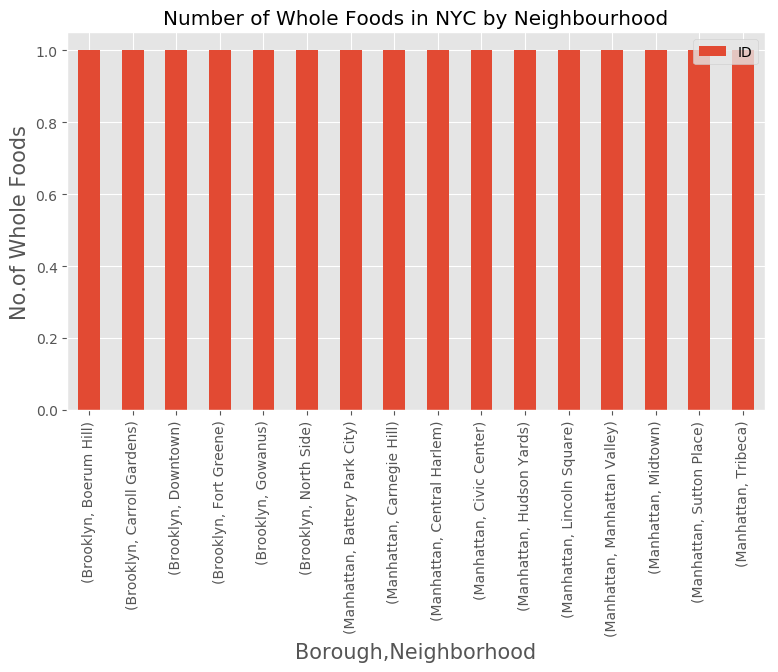

In [15]:
plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('Number of Whole Foods in NYC by Neighbourhood')
#On x-axis
plt.xlabel('Neighborhood', fontsize = 15)
#On y-axis
plt.ylabel('No.of Whole Foods', fontsize=15)
#giving a bar plot
whole_foods_ny.groupby(['Borough','Neighborhood'])['ID'].count().nlargest(20).plot(kind='bar')
#legend
plt.legend()
#displays the plot
plt.show()

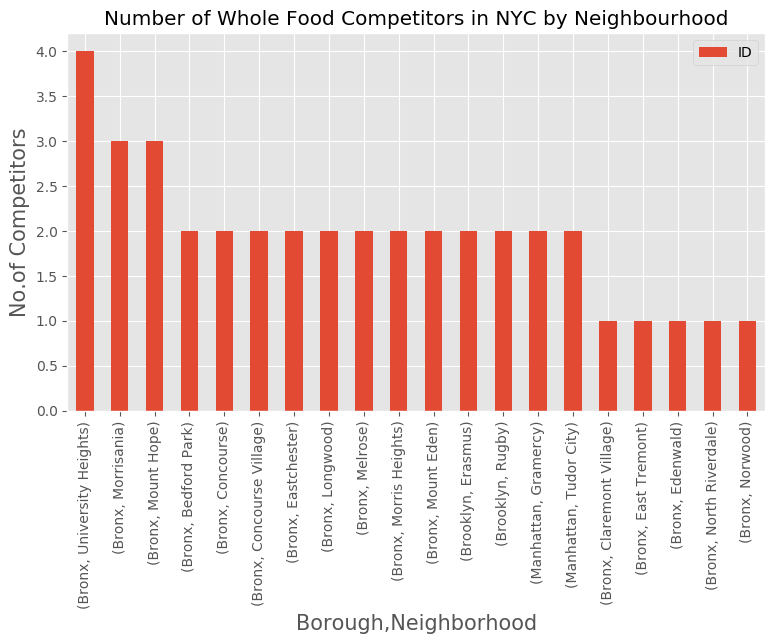

In [16]:
plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('Number of Whole Food Competitors in NYC by Neighbourhood')
#On x-axis
plt.xlabel('Neighborhood', fontsize = 15)
#On y-axis
plt.ylabel('No.of Competitors', fontsize=15)
#giving a bar plot
whole_foods_comp_ny.groupby(['Borough','Neighborhood'])['ID'].count().nlargest(20).plot(kind='bar')
#legend
plt.legend()
#displays the plot
plt.show()

In [17]:
ny_neighborhood_stats=grocery_ny.groupby('Neighborhood',as_index=False).count()
ny_neighborhood_stats.columns=['Neighborhood','ID', 'Name', 'Count']
ny_neighborhood_stats1=ny_neighborhood_stats.drop(['ID','Name'], axis=1)
ny_neighborhood_stats1.sort_values(['Count'],ascending=False).head(10)

,Neighborhood,Count
192,University Heights,10
202,Wingate,6
206,Woodside,6
136,Mount Hope,6
133,Morrisania,6
96,Homecrest,6
113,Longwood,6
123,Melrose,5
162,Remsen Village,5
157,Prospect Park South,5


In [18]:
ny_neighborhood_stats1=ny_neighborhood_stats1[ny_neighborhood_stats1['Count']>=4.0]

ny_neighborhood_stats1

,Neighborhood,Count
2,Astoria,4
14,Boerum Hill,4
44,Concourse,4
45,Concourse Village,4
47,Crown Heights,4
49,Ditmas Park,4
50,Downtown,5
96,Homecrest,6
105,Kensington,4
113,Longwood,6


In [19]:
ny_neighborhood_stats1=pd.merge(ny_neighborhood_stats1,neighborhoods, on='Neighborhood')
ny_neighborhood_stats1=ny_neighborhood_stats1[['Borough','Neighborhood','Latitude','Longitude','Count']]
ny_neighborhood_stats1.sort_values(['Count'],ascending=False).head(10)

,Borough,Neighborhood,Latitude,Longitude,Count
26,Bronx,University Heights,40.855727,-73.910416,10
28,Queens,Woodside,40.746349,-73.901842,6
27,Brooklyn,Wingate,40.660947,-73.937187,6
7,Brooklyn,Homecrest,40.598525,-73.959185,6
15,Bronx,Mount Hope,40.848842,-73.908299,6
9,Bronx,Longwood,40.815099,-73.895788,6
13,Bronx,Morrisania,40.823592,-73.901506,6
11,Bronx,Melrose,40.819754,-73.909422,5
20,Brooklyn,Remsen Village,40.652117,-73.916653,5
19,Queens,Rego Park,40.728974,-73.857827,5


In [20]:
ny_neighborhood_stats2=whole_foods_ny.groupby('Neighborhood',as_index=False).count()
ny_neighborhood_stats2.columns=['Neighborhood','ID', 'Name', 'Count']
ny_neighborhood_stats3=ny_neighborhood_stats.drop(['ID','Name'], axis=1)
ny_neighborhood_stats3=ny_neighborhood_stats2[ny_neighborhood_stats2['Count']>=1.0]
ny_neighborhood_stats3=pd.merge(ny_neighborhood_stats2,neighborhoods, on='Neighborhood')
ny_neighborhood_stats3=ny_neighborhood_stats3[['Borough','Neighborhood','Latitude','Longitude','Count']]
ny_neighborhood_stats3.sort_values(['Count'],ascending=False).head(10)

,Borough,Neighborhood,Latitude,Longitude,Count
0,Manhattan,Battery Park City,40.711932,-74.016869,1
1,Brooklyn,Boerum Hill,40.685683,-73.983748,1
2,Manhattan,Carnegie Hill,40.782683,-73.953256,1
3,Brooklyn,Carroll Gardens,40.680540,-73.994654,1
4,Manhattan,Central Harlem,40.815976,-73.943211,1
5,Manhattan,Civic Center,40.715229,-74.005415,1
6,Brooklyn,Downtown,40.690844,-73.983463,1
7,Brooklyn,Fort Greene,40.688527,-73.972906,1
8,Brooklyn,Gowanus,40.673931,-73.994441,1
9,Manhattan,Hudson Yards,40.756658,-74.000111,1


In [21]:
ny_neighborhood_stats4=whole_foods_comp_ny.groupby('Neighborhood',as_index=False).count()
ny_neighborhood_stats4.columns=['Neighborhood','ID', 'Name', 'Count']
ny_neighborhood_stats5=ny_neighborhood_stats.drop(['ID','Name'], axis=1)
ny_neighborhood_stats5=ny_neighborhood_stats4[ny_neighborhood_stats4['Count']>=1.0]
ny_neighborhood_stats5=pd.merge(ny_neighborhood_stats4,neighborhoods, on='Neighborhood')
ny_neighborhood_stats5=ny_neighborhood_stats5[['Borough','Neighborhood','Latitude','Longitude','Count']]
ny_neighborhood_stats5.sort_values(['Count'],ascending=False).head(10)

,Borough,Neighborhood,Latitude,Longitude,Count
63,Bronx,University Heights,40.855727,-73.910416,4
46,Bronx,Mount Hope,40.848842,-73.908299,3
44,Bronx,Morrisania,40.823592,-73.901506,3
0,Bronx,Bedford Park,40.870185,-73.885512,2
14,Bronx,Concourse Village,40.824780,-73.915847,2
62,Manhattan,Tudor City,40.746917,-73.971219,2
58,Brooklyn,Rugby,40.655572,-73.926882,2
45,Bronx,Mount Eden,40.843826,-73.916556,2
43,Bronx,Morris Heights,40.847898,-73.919672,2
41,Bronx,Melrose,40.819754,-73.909422,2


In [22]:
ny_map = folium.Map(location=(40.693943, -73.985880), zoom_start=11)
# instantiate a feature group for the incidents in the dataframe
incidents = folium.map.FeatureGroup()

# loop through the 100 crimes and add each to the incidents feature group
for lat, lng, in ny_neighborhood_stats1[['Latitude','Longitude']].values:
    incidents.add_child(
        folium.CircleMarker(
            [lat, lng],
            radius=10, # define how big you want the circle markers to be
            color='yellow',
            fill=True,
            fill_color='yellow',
            fill_opacity=0.6
        )
    )
ny_neighborhood_stats1['Label']=ny_neighborhood_stats1['Neighborhood']+', '+ny_neighborhood_stats1['Borough']+'('+ny_neighborhood_stats1['Count'].map(str)+')'

for lat, lng, in ny_neighborhood_stats3[['Latitude','Longitude']].values:
    incidents.add_child(
        folium.CircleMarker(
            [lat, lng],
            radius=10, # define how big you want the circle markers to be
            color='green',
            fill=True,
            fill_color='green',
            fill_opacity=0.6
        )
    )
ny_neighborhood_stats3['Label']=ny_neighborhood_stats3['Neighborhood']+', '+ny_neighborhood_stats3['Borough']+'('+ny_neighborhood_stats3['Count'].map(str)+')'

for lat, lng, in ny_neighborhood_stats5[['Latitude','Longitude']].values:
    incidents.add_child(
        folium.CircleMarker(
            [lat, lng],
            radius=10, # define how big you want the circle markers to be
            color='red',
            fill=True,
            fill_color='red',
            fill_opacity=0.6
        )
    )
ny_neighborhood_stats5['Label']=ny_neighborhood_stats5['Neighborhood']+', '+ny_neighborhood_stats5['Borough']+'('+ny_neighborhood_stats5['Count'].map(str)+')'

In [23]:
# add pop-up text to each marker on the map
for lat, lng, label in ny_neighborhood_stats1[['Latitude','Longitude','Label']].values:
    folium.Marker([lat, lng], popup=label).add_to(ny_map)  

for lat, lng, label in ny_neighborhood_stats3[['Latitude','Longitude','Label']].values:
    folium.Marker([lat, lng], popup=label).add_to(ny_map)  

for lat, lng, label in ny_neighborhood_stats5[['Latitude','Longitude','Label']].values:
    folium.Marker([lat, lng], popup=label).add_to(ny_map) 
# add incidents to map
ny_map.add_child(incidents)

After looking at the map where yellow indicates supermarkets in general, red indicates competitors and green indicates Whole Foods Markets, there are two strategies.
One is to open a store where 1)there are already other grocery stores but no direct competitors or 2) in neighborhoods which are surrounded by competitors but don't have any grocery stores at all.

Neighborhoods for strategy 1) would be Sunnyside Gardens, Woodside, Sunnyside, Astoria (Queens) or Crown Heights (Brooklyn). 
Areas for strategy 1) would be south of Sunnyside Gardens (Queens) and north of Brownsville (Brooklyn) or either southeast or southwest of Flatbush (Brooklyn).